# Forest Cover Type

## Introduction

On s'intéresse ici à la prédiction du type de végétation forestières de différentes parcelles (30m * 30m) à partir de caractéristiques cartographiques (altitude, inclinaison, type de sol…).
Les données correspondent à environ 581 000 parcelles de taille 30m * 30m situées dans le Colorado (Roosevelt National Forest). Pour chacune de ces parcelles, on connaît le type de végétation forestière (7 modalités).
L'évaluation se fait sur un échantillon test contenant environ 481 012 parcelles dont il faut prédire le type de végétation (variable catégorielle à 7 modalités).

## Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
!pip install xgboost
!pip install catboost
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_sample_weight
!pip install lightgbm
import lightgbm as lgb
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [2]:
train = pd.read_csv('/Users/malekbouzidi/Desktop/M2 Math&IA/Data Challenge et apprentissage supervisé /Forest cover type/Raw Data/train.csv')
test = pd.read_csv('/Users/malekbouzidi/Desktop/M2 Math&IA/Data Challenge et apprentissage supervisé /Forest cover type/Raw Data/test.csv')

In [3]:
def write_to_submission_file(predicted_labels, out_file,
                             target='Cover_Type', index_label="row_ID"):
    # Create a DataFrame where row_ID starts from 0
    predicted_df = pd.DataFrame(predicted_labels,
                                index=np.arange(0, predicted_labels.shape[0]),
                                columns=[target])
    
    # Save as CSV file with row_ID starting from 0
    predicted_df.to_csv(out_file, index_label=index_label)

In [4]:
print('size of train data',train.shape)
print('size of test data',test.shape)

size of train data (100000, 56)
size of test data (481012, 55)


In [5]:
train.head(1).T

,0
Unnamed: 0,0
Elevation,2909
Aspect,28
Slope,18
Horizontal_Distance_To_Hydrology,182
Vertical_Distance_To_Hydrology,58
Horizontal_Distance_To_Roadways,1350
Hillshade_9am,210
Hillshade_Noon,197
Hillshade_3pm,117


In [6]:
train.dtypes

Unnamed: 0                            int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 56 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Unnamed: 0                          100000 non-null  int64
 1   Elevation                           100000 non-null  int64
 2   Aspect                              100000 non-null  int64
 3   Slope                               100000 non-null  int64
 4   Horizontal_Distance_To_Hydrology    100000 non-null  int64
 5   Vertical_Distance_To_Hydrology      100000 non-null  int64
 6   Horizontal_Distance_To_Roadways     100000 non-null  int64
 7   Hillshade_9am                       100000 non-null  int64
 8   Hillshade_Noon                      100000 non-null  int64
 9   Hillshade_3pm                       100000 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  100000 non-null  int64
 11  Wilderness_Area1                    100000 non-null  

In [8]:
train.isnull().sum()

Unnamed: 0                            0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,100000.0,49999.50000,28867.657797,0.0,24999.75,49999.5,74999.25,99999.0
Elevation,100000.0,2959.21515,280.832825,1860.0,2809.00,2996.0,3163.00,3858.0
Aspect,100000.0,155.55126,111.759698,0.0,59.00,127.0,260.00,360.0
Slope,100000.0,14.12285,7.507368,0.0,9.00,13.0,18.00,62.0
Horizontal_Distance_To_Hydrology,100000.0,269.60563,212.770595,0.0,108.00,218.0,384.00,1383.0
Vertical_Distance_To_Hydrology,100000.0,46.82159,58.689319,-161.0,7.00,30.0,69.00,598.0
Horizontal_Distance_To_Roadways,100000.0,2350.36113,1560.499103,0.0,1103.00,1992.0,3331.25,7078.0
Hillshade_9am,100000.0,212.10380,26.841126,0.0,198.00,218.0,231.00,254.0
Hillshade_Noon,100000.0,223.34867,19.756411,42.0,213.00,226.0,237.00,254.0
Hillshade_3pm,100000.0,142.58566,38.459542,0.0,119.00,143.0,169.00,254.0


In [10]:
train.groupby('Cover_Type').count()

,Unnamed: 0,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,36410,36410,36410,36410,36410,36410,36410,36410,36410,36410,...,36410,36410,36410,36410,36410,36410,36410,36410,36410,36410
2,48676,48676,48676,48676,48676,48676,48676,48676,48676,48676,...,48676,48676,48676,48676,48676,48676,48676,48676,48676,48676
3,6273,6273,6273,6273,6273,6273,6273,6273,6273,6273,...,6273,6273,6273,6273,6273,6273,6273,6273,6273,6273
4,471,471,471,471,471,471,471,471,471,471,...,471,471,471,471,471,471,471,471,471,471
5,1635,1635,1635,1635,1635,1635,1635,1635,1635,1635,...,1635,1635,1635,1635,1635,1635,1635,1635,1635,1635
6,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,...,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967
7,3568,3568,3568,3568,3568,3568,3568,3568,3568,3568,...,3568,3568,3568,3568,3568,3568,3568,3568,3568,3568


Nous remarquons que les données ne sont pas équidistribuées sur les différentes classes.

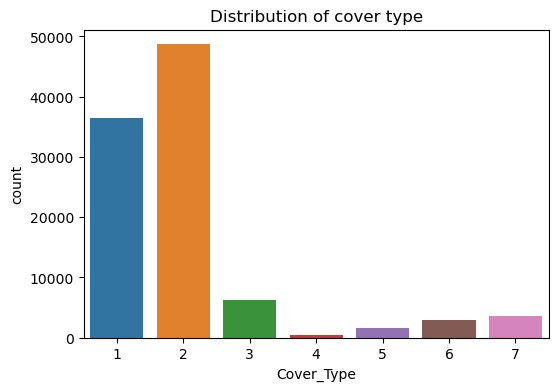

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Cover_Type', data=train)
plt.title('Distribution of cover type')
plt.show()

## Data Cleansing

### Convertir Soil_Type et Wilderness_Area de données binaires en données multi-classe

In [12]:
import pandas as pd

# Liste des colonnes de types de sol
soil_columns = [f'Soil_Type{i}' for i in range(1, 41)]

# Trouver l'indice de la colonne qui contient 1 pour chaque ligne
train['Soil_Type'] = train[soil_columns].idxmax(axis=1)

# Retirer le préfixe 'soil_type' pour ne garder que le numéro (de 1 à 40)
train['Soil_Type'] = train['Soil_Type'].str.extract('(\d+)').astype(int)

# Supprimer les colonnes binaires originales
train.drop(columns=soil_columns, inplace=True)

In [13]:
# Liste des colonnes de wilderness area 
wilderness_columns = [f'Wilderness_Area{i}' for i in range(1, 5)]

# Trouver l'indice de la colonne qui contient 1 pour chaque ligne
train['Wilderness_Area'] = train[wilderness_columns].idxmax(axis=1)

# Retirer le préfixe 'soil_type' pour ne garder que le numéro (de 1 à 40)
train['Wilderness_Area'] = train['Wilderness_Area'].str.extract('(\d+)').astype(int)

# Supprimer les colonnes binaires originales
train.drop(columns=wilderness_columns, inplace=True)

In [14]:
train.head(10)

,Unnamed: 0,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area
0,0,2909,28,18,182,58,1350,210,197,117,2160,2,31,3
1,1,2757,334,30,212,83,1384,137,184,177,1570,2,24,3
2,2,3283,248,4,150,15,5601,211,243,170,892,1,38,1
3,3,3019,330,14,541,-101,1811,186,222,175,2154,2,31,3
4,4,3039,340,20,474,74,3407,175,207,169,1879,1,39,3
5,5,3000,225,4,335,44,1354,214,244,167,1500,2,31,3
6,6,3014,286,8,0,0,1841,199,240,181,1445,1,21,3
7,7,3439,323,16,592,101,1766,179,222,182,552,7,39,3
8,8,2796,90,7,379,63,721,231,229,130,2442,2,29,1
9,9,3149,135,12,108,10,2989,238,235,125,3487,1,39,1


In [15]:
train.rename(columns={'Unnamed: 0': 'row_ID'}, inplace=True)

In [16]:
train.columns

Index(['row_ID', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Cover_Type',
       'Soil_Type', 'Wilderness_Area'],
      dtype='object')

In [17]:
train.sample(5).T

,29665,7419,33821,64568,83734
row_ID,29665,7419,33821,64568,83734
Elevation,3043,2885,3200,3031,3216
Aspect,340,333,359,103,269
Slope,20,2,18,8,21
Horizontal_Distance_To_Hydrology,297,306,201,60,277
Vertical_Distance_To_Hydrology,119,60,28,6,62
Horizontal_Distance_To_Roadways,2455,2574,1869,3307,4709
Hillshade_9am,173,214,191,234,161
Hillshade_Noon,206,236,204,230,242
Hillshade_3pm,169,160,149,127,218


## Exploratory Data Analysis

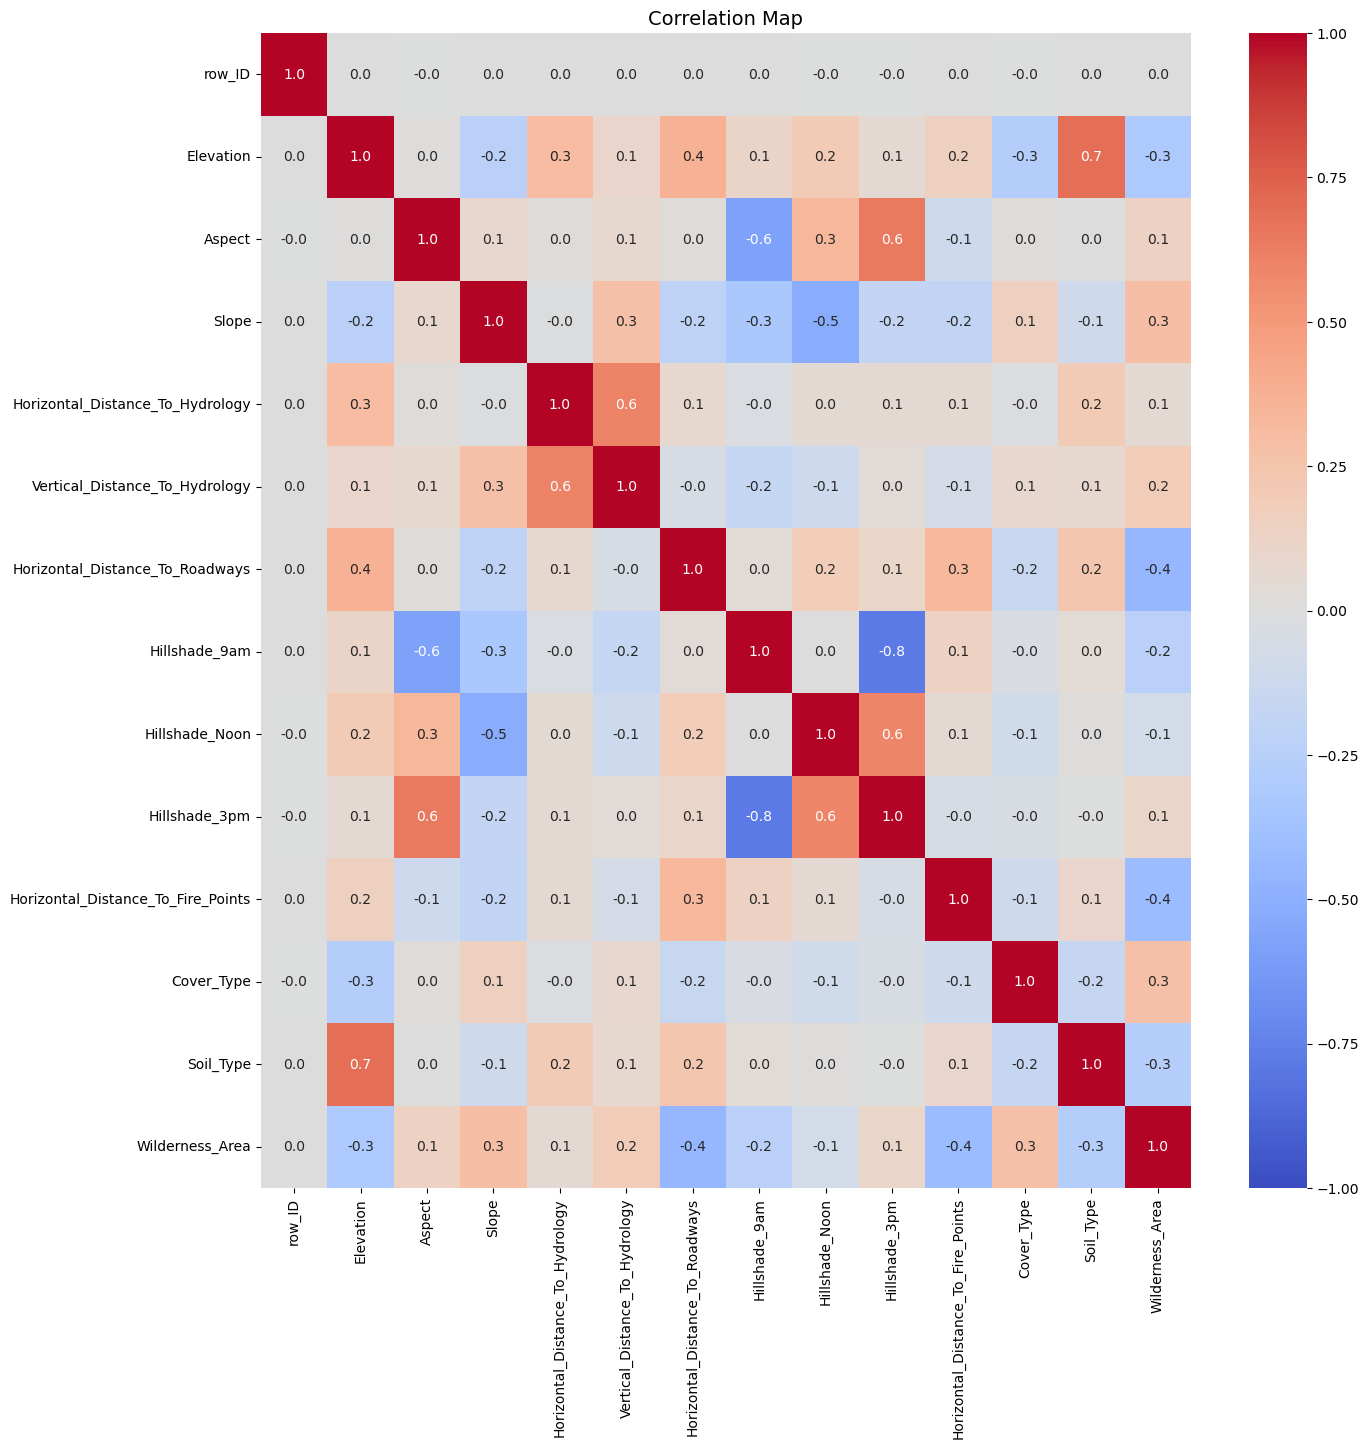

In [18]:
corr_matrix = train.corr()
f,ax=plt.subplots(figsize = (15,15))
sns.heatmap(corr_matrix,annot= True,fmt = ".1f",ax=ax,cmap='coolwarm',vmin=-1,vmax=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map', size = 14)
plt.show()

In [19]:
abs(train.corr())[['Cover_Type']].style.background_gradient(cmap='coolwarm')

,Cover_Type
row_ID,0.002710
Elevation,0.267913
Aspect,0.019812
Slope,0.148695
Horizontal_Distance_To_Hydrology,0.022724
Vertical_Distance_To_Hydrology,0.080165
Horizontal_Distance_To_Roadways,0.152771
Hillshade_9am,0.037459
Hillshade_Noon,0.094558
Hillshade_3pm,0.046250


Nous remarquons bien que les données ne sont pas corrélées. Nous envisagons à faire une ACP

## ACP

In [20]:
# Étape 1 : Normalisation des données
features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
            'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
            'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
            'Horizontal_Distance_To_Fire_Points', 'Soil_Type', 'Wilderness_Area']
X = train[features]
X = StandardScaler().fit_transform(X)

# Étape 2 : Application de l'ACP
pca = PCA(n_components=0.95)  # Choix pour capturer 95% de la variance
X_pca = pca.fit_transform(X)

# Étape 3 : Affichage des résultats
print("Variance expliquée par chaque composante : ", pca.explained_variance_ratio_)
print("Variance cumulée : ", pca.explained_variance_ratio_.cumsum())


df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
print(df_pca.head())


Variance expliquée par chaque composante :  [0.22885564 0.21728796 0.15794338 0.10032595 0.0873057  0.05160535
 0.04062695 0.03873682 0.02965274]
Variance cumulée :  [0.22885564 0.4461436  0.60408698 0.70441293 0.79171863 0.84332398
 0.88395093 0.92268776 0.9523405 ]
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.511988 -1.577399  0.815859  0.489421 -0.584956 -0.667303  0.705766   
1  3.432433  1.023018  1.235960  2.593819 -0.184272 -0.435828 -0.069434   
2 -2.209091  2.058166 -0.720133  0.294827 -1.308512  1.465334 -0.111851   
3  0.502866  1.592360 -0.539302  0.415193 -1.010951 -1.050009  0.788392   
4  0.774880  1.837006  1.789940  1.245141 -0.601061 -0.064692  0.633121   

        PC8       PC9  
0 -0.641718 -0.299635  
1 -0.303849  0.470317  
2 -0.038300  0.190943  
3  0.007276  2.247459  
4  0.213523  1.003830  


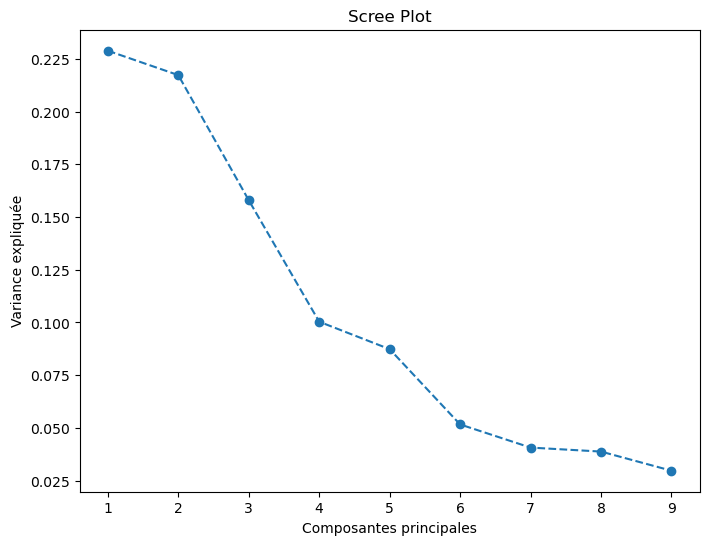

In [21]:
# Graphique des valeurs propres
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Composantes principales')
plt.ylabel('Variance expliquée')
plt.title('Scree Plot')
plt.show()


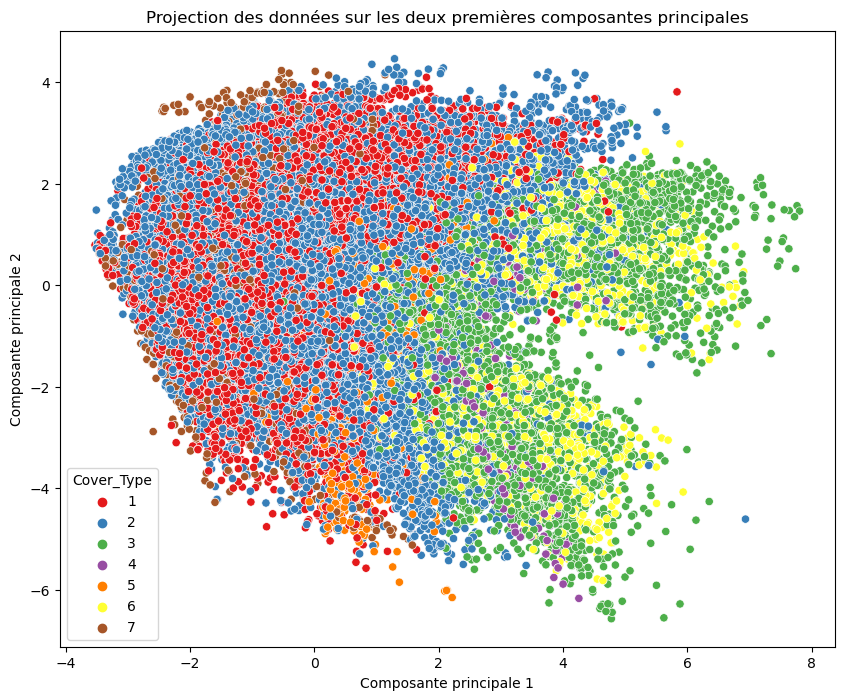

In [22]:
# Projection des données sur les deux premières composantes principales
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=train['Cover_Type'], palette='Set1')  
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Projection des données sur les deux premières composantes principales')
plt.legend(title='Cover_Type')
plt.show()


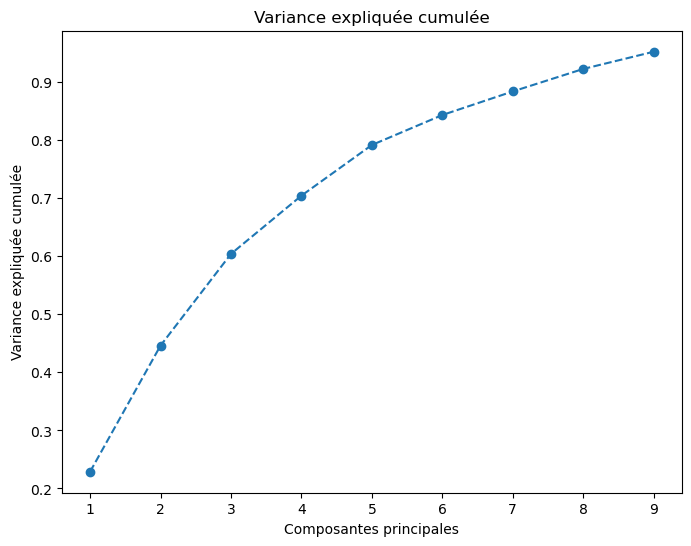

In [23]:
# Graphique de la variance expliquée cumulative
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.title('Variance expliquée cumulée')
plt.show()

### Data Augmentation

In [24]:
# Separate out classes 4 and 5 for augmentation
data_class_1 = train[train['Cover_Type'] == 1]
data_class_2 = train[train['Cover_Type'] == 2]
data_class_3 = train[train['Cover_Type'] == 3]
data_class_4 = train[train['Cover_Type'] == 4]
data_class_5 = train[train['Cover_Type'] == 5]
data_class_6 = train[train['Cover_Type'] == 6]
data_class_7 = train[train['Cover_Type'] == 7]

In [25]:
data_class_5.columns

Index(['row_ID', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Cover_Type',
       'Soil_Type', 'Wilderness_Area'],
      dtype='object')

In [26]:
# Calcul des écarts-types pour chaque colonne dans data_class_3
elevation_std = np.std(data_class_3['Elevation'])
aspect_std = np.std(data_class_3['Aspect'])
slope_std = np.std(data_class_3['Slope'])
horizontal_distance_to_hydrology_std = np.std(data_class_3['Horizontal_Distance_To_Hydrology'])
vertical_distance_to_hydrology_std = np.std(data_class_3['Vertical_Distance_To_Hydrology'])
horizontal_distance_to_roadways_std = np.std(data_class_3['Horizontal_Distance_To_Roadways'])
hillshade_9am_std = np.std(data_class_3['Hillshade_9am'])
hillshade_noon_std = np.std(data_class_3['Hillshade_Noon'])
hillshade_3pm_std = np.std(data_class_3['Hillshade_3pm'])
horizontal_distance_to_fire_points_std = np.std(data_class_3['Horizontal_Distance_To_Fire_Points'])


In [27]:
dataset_class_3 = []
for _, row in data_class_3.iterrows():
    temp = {
        'Elevation': row['Elevation'],
        'Aspect': row['Aspect'],
        'Slope': row['Slope'],
        'Horizontal_Distance_To_Hydrology': row['Horizontal_Distance_To_Hydrology'],
        'Vertical_Distance_To_Hydrology': row['Vertical_Distance_To_Hydrology'],
        'Horizontal_Distance_To_Roadways': row['Horizontal_Distance_To_Roadways'],
        'Hillshade_9am': row['Hillshade_9am'],
        'Hillshade_Noon': row['Hillshade_Noon'],
        'Hillshade_3pm': row['Hillshade_3pm'],
        'Horizontal_Distance_To_Fire_Points': row['Horizontal_Distance_To_Fire_Points'],
        'Cover_Type': 3
    }
    dataset_class_3.append(temp)

for _ in range(2):
    for _, row in data_class_3.iterrows():
        temp = {
            'Elevation': row['Elevation'] + np.random.normal(elevation_std),
            'Aspect': row['Aspect'] + np.random.normal(aspect_std),
            'Slope': row['Slope'] + np.random.normal(slope_std),
            'Horizontal_Distance_To_Hydrology': row['Horizontal_Distance_To_Hydrology'] + np.random.normal(horizontal_distance_to_hydrology_std),
            'Vertical_Distance_To_Hydrology': row['Vertical_Distance_To_Hydrology'] + np.random.normal(vertical_distance_to_hydrology_std),
            'Horizontal_Distance_To_Roadways': row['Horizontal_Distance_To_Roadways'] + np.random.normal(horizontal_distance_to_roadways_std),
            'Hillshade_9am': row['Hillshade_9am'] + np.random.normal(hillshade_9am_std),
            'Hillshade_Noon': row['Hillshade_Noon'] + np.random.normal(hillshade_noon_std),
            'Hillshade_3pm': row['Hillshade_3pm'] + np.random.normal(hillshade_3pm_std),
            'Horizontal_Distance_To_Fire_Points': row['Horizontal_Distance_To_Fire_Points'] + np.random.normal(horizontal_distance_to_fire_points_std),
            'Cover_Type': 3
        }
        dataset_class_3.append(temp)

dataset_class_3 = pd.DataFrame(dataset_class_3)
print(f'Data size before Performing Data Augmentation: {len(data_class_3)}')
print(f'Data size after Performing Data Augmentation: {len(dataset_class_3)}')


Data size before Performing Data Augmentation: 6273
Data size after Performing Data Augmentation: 18819


In [28]:
elevation_std = np.std(data_class_5['Elevation'])
aspect_std = np.std(data_class_5['Aspect'])
slope_std = np.std(data_class_5['Slope'])
horizontal_distance_to_hydrology_std = np.std(data_class_5['Horizontal_Distance_To_Hydrology'])
vertical_distance_to_hydrology_std = np.std(data_class_5['Vertical_Distance_To_Hydrology'])
horizontal_distance_to_roadways_std = np.std(data_class_5['Horizontal_Distance_To_Roadways'])
hillshade_9am_std = np.std(data_class_5['Hillshade_9am'])
hillshade_noon_std = np.std(data_class_5['Hillshade_Noon'])
hillshade_3pm_std = np.std(data_class_5['Hillshade_3pm'])
horizontal_distance_to_fire_points_std = np.std(data_class_5['Horizontal_Distance_To_Fire_Points'])


In [29]:
dataset_class_5 = []
for _, row in data_class_5.iterrows():
    temp = {
        'Elevation': row['Elevation'],
        'Aspect': row['Aspect'],
        'Slope': row['Slope'],
        'Horizontal_Distance_To_Hydrology': row['Horizontal_Distance_To_Hydrology'],
        'Vertical_Distance_To_Hydrology': row['Vertical_Distance_To_Hydrology'],
        'Horizontal_Distance_To_Roadways': row['Horizontal_Distance_To_Roadways'],
        'Hillshade_9am': row['Hillshade_9am'],
        'Hillshade_Noon': row['Hillshade_Noon'],
        'Hillshade_3pm': row['Hillshade_3pm'],
        'Horizontal_Distance_To_Fire_Points': row['Horizontal_Distance_To_Fire_Points'],
        'Cover_Type': 5
    }
    dataset_class_5.append(temp)

for _ in range(4):
    for _, row in data_class_5.iterrows():
        temp = {
            'Elevation': row['Elevation'] + np.random.normal(elevation_std),
            'Aspect': row['Aspect'] + np.random.normal(aspect_std),
            'Slope': row['Slope'] + np.random.normal(slope_std),
            'Horizontal_Distance_To_Hydrology': row['Horizontal_Distance_To_Hydrology'] + np.random.normal(horizontal_distance_to_hydrology_std),
            'Vertical_Distance_To_Hydrology': row['Vertical_Distance_To_Hydrology'] + np.random.normal(vertical_distance_to_hydrology_std),
            'Horizontal_Distance_To_Roadways': row['Horizontal_Distance_To_Roadways'] + np.random.normal(horizontal_distance_to_roadways_std),
            'Hillshade_9am': row['Hillshade_9am'] + np.random.normal(hillshade_9am_std),
            'Hillshade_Noon': row['Hillshade_Noon'] + np.random.normal(hillshade_noon_std),
            'Hillshade_3pm': row['Hillshade_3pm'] + np.random.normal(hillshade_3pm_std),
            'Horizontal_Distance_To_Fire_Points': row['Horizontal_Distance_To_Fire_Points'] + np.random.normal(horizontal_distance_to_fire_points_std),
            'Cover_Type': 5
        }
        dataset_class_5.append(temp)

dataset_class_5 = pd.DataFrame(dataset_class_5)
print(f'Data size before Performing Data Augmentation: {len(data_class_5)}')
print(f'Data size after Performing Data Augmentation: {len(dataset_class_5)}')


Data size before Performing Data Augmentation: 1635
Data size after Performing Data Augmentation: 8175


In [30]:
# Calculate standard deviations for data_class_4
elevation_std = np.std(data_class_4['Elevation'])
aspect_std = np.std(data_class_4['Aspect'])
slope_std = np.std(data_class_4['Slope'])
horizontal_distance_to_hydrology_std = np.std(data_class_4['Horizontal_Distance_To_Hydrology'])
vertical_distance_to_hydrology_std = np.std(data_class_4['Vertical_Distance_To_Hydrology'])
horizontal_distance_to_roadways_std = np.std(data_class_4['Horizontal_Distance_To_Roadways'])
hillshade_9am_std = np.std(data_class_4['Hillshade_9am'])
hillshade_noon_std = np.std(data_class_4['Hillshade_Noon'])
hillshade_3pm_std = np.std(data_class_4['Hillshade_3pm'])
horizontal_distance_to_fire_points_std = np.std(data_class_4['Horizontal_Distance_To_Fire_Points'])


In [31]:

# Initialize dataset_class_4 list
dataset_class_4 = []

# Original rows
for _, row in data_class_4.iterrows():
    temp = {
        'Elevation': row['Elevation'],
        'Aspect': row['Aspect'],
        'Slope': row['Slope'],
        'Horizontal_Distance_To_Hydrology': row['Horizontal_Distance_To_Hydrology'],
        'Vertical_Distance_To_Hydrology': row['Vertical_Distance_To_Hydrology'],
        'Horizontal_Distance_To_Roadways': row['Horizontal_Distance_To_Roadways'],
        'Hillshade_9am': row['Hillshade_9am'],
        'Hillshade_Noon': row['Hillshade_Noon'],
        'Hillshade_3pm': row['Hillshade_3pm'],
        'Horizontal_Distance_To_Fire_Points': row['Horizontal_Distance_To_Fire_Points'],
        'Cover_Type': 4
    }
    dataset_class_4.append(temp)

# Data augmentation
for _ in range(7):
    for _, row in data_class_4.iterrows():
        temp = {
            'Elevation': row['Elevation'] + np.random.normal(elevation_std),
            'Aspect': row['Aspect'] + np.random.normal(aspect_std),
            'Slope': row['Slope'] + np.random.normal(slope_std),
            'Horizontal_Distance_To_Hydrology': row['Horizontal_Distance_To_Hydrology'] + np.random.normal(horizontal_distance_to_hydrology_std),
            'Vertical_Distance_To_Hydrology': row['Vertical_Distance_To_Hydrology'] + np.random.normal(vertical_distance_to_hydrology_std),
            'Horizontal_Distance_To_Roadways': row['Horizontal_Distance_To_Roadways'] + np.random.normal(horizontal_distance_to_roadways_std),
            'Hillshade_9am': row['Hillshade_9am'] + np.random.normal(hillshade_9am_std),
            'Hillshade_Noon': row['Hillshade_Noon'] + np.random.normal(hillshade_noon_std),
            'Hillshade_3pm': row['Hillshade_3pm'] + np.random.normal(hillshade_3pm_std),
            'Horizontal_Distance_To_Fire_Points': row['Horizontal_Distance_To_Fire_Points'] + np.random.normal(horizontal_distance_to_fire_points_std),
            'Cover_Type': 4
        }
        dataset_class_4.append(temp)

# Convert to DataFrame and print results
dataset_class_4 = pd.DataFrame(dataset_class_4)
print(f'Data size before Performing Data Augmentation: {len(data_class_4)}')
print(f'Data size after Performing Data Augmentation: {len(dataset_class_4)}')


Data size before Performing Data Augmentation: 471
Data size after Performing Data Augmentation: 3768


In [32]:
# Calculate standard deviations for each column in data_class_6
elevation_std = np.std(data_class_6['Elevation'])
aspect_std = np.std(data_class_6['Aspect'])
slope_std = np.std(data_class_6['Slope'])
horizontal_distance_to_hydrology_std = np.std(data_class_6['Horizontal_Distance_To_Hydrology'])
vertical_distance_to_hydrology_std = np.std(data_class_6['Vertical_Distance_To_Hydrology'])
horizontal_distance_to_roadways_std = np.std(data_class_6['Horizontal_Distance_To_Roadways'])
hillshade_9am_std = np.std(data_class_6['Hillshade_9am'])
hillshade_noon_std = np.std(data_class_6['Hillshade_Noon'])
hillshade_3pm_std = np.std(data_class_6['Hillshade_3pm'])
horizontal_distance_to_fire_points_std = np.std(data_class_6['Horizontal_Distance_To_Fire_Points'])


In [33]:

# Initialize dataset for class 6
dataset_class_6 = []
for _, row in data_class_6.iterrows():
    temp = {
        'Elevation': row['Elevation'],
        'Aspect': row['Aspect'],
        'Slope': row['Slope'],
        'Horizontal_Distance_To_Hydrology': row['Horizontal_Distance_To_Hydrology'],
        'Vertical_Distance_To_Hydrology': row['Vertical_Distance_To_Hydrology'],
        'Horizontal_Distance_To_Roadways': row['Horizontal_Distance_To_Roadways'],
        'Hillshade_9am': row['Hillshade_9am'],
        'Hillshade_Noon': row['Hillshade_Noon'],
        'Hillshade_3pm': row['Hillshade_3pm'],
        'Horizontal_Distance_To_Fire_Points': row['Horizontal_Distance_To_Fire_Points'],
        'Cover_Type': 6
    }
    dataset_class_6.append(temp)

# Perform data augmentation for class 6
for _ in range(2):
    for _, row in data_class_6.iterrows():
        temp = {
            'Elevation': row['Elevation'] + np.random.normal(elevation_std),
            'Aspect': row['Aspect'] + np.random.normal(aspect_std),
            'Slope': row['Slope'] + np.random.normal(slope_std),
            'Horizontal_Distance_To_Hydrology': row['Horizontal_Distance_To_Hydrology'] + np.random.normal(horizontal_distance_to_hydrology_std),
            'Vertical_Distance_To_Hydrology': row['Vertical_Distance_To_Hydrology'] + np.random.normal(vertical_distance_to_hydrology_std),
            'Horizontal_Distance_To_Roadways': row['Horizontal_Distance_To_Roadways'] + np.random.normal(horizontal_distance_to_roadways_std),
            'Hillshade_9am': row['Hillshade_9am'] + np.random.normal(hillshade_9am_std),
            'Hillshade_Noon': row['Hillshade_Noon'] + np.random.normal(hillshade_noon_std),
            'Hillshade_3pm': row['Hillshade_3pm'] + np.random.normal(hillshade_3pm_std),
            'Horizontal_Distance_To_Fire_Points': row['Horizontal_Distance_To_Fire_Points'] + np.random.normal(horizontal_distance_to_fire_points_std),
            'Cover_Type': 6
        }
        dataset_class_6.append(temp)

# Convert the dataset_class_6 list to a DataFrame
dataset_class_6 = pd.DataFrame(dataset_class_6)

# Print sizes to confirm augmentation
print(f'Data size before Performing Data Augmentation: {len(data_class_6)}')
print(f'Data size after Performing Data Augmentation: {len(dataset_class_6)}')


Data size before Performing Data Augmentation: 2967
Data size after Performing Data Augmentation: 8901


In [34]:
# Calculate standard deviations for each column in data_class_7
elevation_std = np.std(data_class_7['Elevation'])
aspect_std = np.std(data_class_7['Aspect'])
slope_std = np.std(data_class_7['Slope'])
horizontal_distance_to_hydrology_std = np.std(data_class_7['Horizontal_Distance_To_Hydrology'])
vertical_distance_to_hydrology_std = np.std(data_class_7['Vertical_Distance_To_Hydrology'])
horizontal_distance_to_roadways_std = np.std(data_class_7['Horizontal_Distance_To_Roadways'])
hillshade_9am_std = np.std(data_class_7['Hillshade_9am'])
hillshade_noon_std = np.std(data_class_7['Hillshade_Noon'])
hillshade_3pm_std = np.std(data_class_7['Hillshade_3pm'])
horizontal_distance_to_fire_points_std = np.std(data_class_7['Horizontal_Distance_To_Fire_Points'])


In [35]:

# Initialize dataset for class 7
dataset_class_7 = []
for _, row in data_class_7.iterrows():
    temp = {
        'Elevation': row['Elevation'],
        'Aspect': row['Aspect'],
        'Slope': row['Slope'],
        'Horizontal_Distance_To_Hydrology': row['Horizontal_Distance_To_Hydrology'],
        'Vertical_Distance_To_Hydrology': row['Vertical_Distance_To_Hydrology'],
        'Horizontal_Distance_To_Roadways': row['Horizontal_Distance_To_Roadways'],
        'Hillshade_9am': row['Hillshade_9am'],
        'Hillshade_Noon': row['Hillshade_Noon'],
        'Hillshade_3pm': row['Hillshade_3pm'],
        'Horizontal_Distance_To_Fire_Points': row['Horizontal_Distance_To_Fire_Points'],
        'Cover_Type': 7
    }
    dataset_class_7.append(temp)

# Perform data augmentation for class 7
for _ in range(2):
    for _, row in data_class_7.iterrows():
        temp = {
            'Elevation': row['Elevation'] + np.random.normal(elevation_std),
            'Aspect': row['Aspect'] + np.random.normal(aspect_std),
            'Slope': row['Slope'] + np.random.normal(slope_std),
            'Horizontal_Distance_To_Hydrology': row['Horizontal_Distance_To_Hydrology'] + np.random.normal(horizontal_distance_to_hydrology_std),
            'Vertical_Distance_To_Hydrology': row['Vertical_Distance_To_Hydrology'] + np.random.normal(vertical_distance_to_hydrology_std),
            'Horizontal_Distance_To_Roadways': row['Horizontal_Distance_To_Roadways'] + np.random.normal(horizontal_distance_to_roadways_std),
            'Hillshade_9am': row['Hillshade_9am'] + np.random.normal(hillshade_9am_std),
            'Hillshade_Noon': row['Hillshade_Noon'] + np.random.normal(hillshade_noon_std),
            'Hillshade_3pm': row['Hillshade_3pm'] + np.random.normal(hillshade_3pm_std),
            'Horizontal_Distance_To_Fire_Points': row['Horizontal_Distance_To_Fire_Points'] + np.random.normal(horizontal_distance_to_fire_points_std),
            'Cover_Type': 7
        }
        dataset_class_7.append(temp)

# Convert the dataset_class_7 list to a DataFrame
dataset_class_7 = pd.DataFrame(dataset_class_7)

# Print sizes to confirm augmentation
print(f'Data size before Performing Data Augmentation: {len(data_class_7)}')
print(f'Data size after Performing Data Augmentation: {len(dataset_class_7)}')


Data size before Performing Data Augmentation: 3568
Data size after Performing Data Augmentation: 10704


In [36]:
# Concatenate the augmented datasets with the original train data
train_augmented = pd.concat([train, dataset_class_3, dataset_class_4, dataset_class_5, data_class_6, data_class_7], ignore_index=True)

# Verify the size of the new augmented training dataset
print(f"Original train data size: {len(train)}")
print(f"Data size after augmentation: {len(train_augmented)}")


Original train data size: 100000
Data size after augmentation: 137297


In [37]:
train_augmented.groupby('Cover_Type').count()

,row_ID,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness_Area
Cover_Type,,,,,,,,,,,,,
1,36410,36410,36410,36410,36410,36410,36410,36410,36410,36410,36410,36410,36410
2,48676,48676,48676,48676,48676,48676,48676,48676,48676,48676,48676,48676,48676
3,6273,25092,25092,25092,25092,25092,25092,25092,25092,25092,25092,6273,6273
4,471,4239,4239,4239,4239,4239,4239,4239,4239,4239,4239,471,471
5,1635,9810,9810,9810,9810,9810,9810,9810,9810,9810,9810,1635,1635
6,5934,5934,5934,5934,5934,5934,5934,5934,5934,5934,5934,5934,5934
7,7136,7136,7136,7136,7136,7136,7136,7136,7136,7136,7136,7136,7136


## Test-Train split

### Faire les mêmes changements pour test

In [38]:
# Liste des colonnes de types de sol
soil_columns = [f'Soil_Type{i}' for i in range(1, 41)]

# Trouver l'indice de la colonne qui contient 1 pour chaque ligne
test['Soil_Type'] = test[soil_columns].idxmax(axis=1)

# Retirer le préfixe 'soil_type' pour ne garder que le numéro (de 1 à 40)
test['Soil_Type'] = test['Soil_Type'].str.extract('(\d+)').astype(int)

# Supprimer les colonnes binaires originales
test.drop(columns=soil_columns, inplace=True)

In [39]:
# Liste des colonnes de wilderness area 
wilderness_columns = [f'Wilderness_Area{i}' for i in range(1, 5)]

# Trouver l'indice de la colonne qui contient 1 pour chaque ligne
test['Wilderness_Area'] = test[wilderness_columns].idxmax(axis=1)

# Retirer le préfixe 'soil_type' pour ne garder que le numéro (de 1 à 40)
test['Wilderness_Area'] = test['Wilderness_Area'].str.extract('(\d+)').astype(int)

# Supprimer les colonnes binaires originales
test.drop(columns=wilderness_columns, inplace=True)

In [40]:
test.head(10)

,row_ID,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness_Area
0,0,2767,66,17,210,18,1190,234,204,96,2251,31,3
1,1,2724,160,19,60,4,1350,236,240,127,2514,17,3
2,2,2360,65,7,127,21,1377,227,226,134,339,6,4
3,3,2995,45,4,285,30,5125,221,231,146,5706,12,1
4,4,2400,106,27,150,63,342,253,196,51,811,4,3
5,5,2656,20,9,323,73,1082,214,221,143,1036,12,1
6,6,2992,105,36,201,141,1211,252,170,12,1584,33,3
7,7,3110,32,14,379,43,5028,216,208,125,2845,30,1
8,8,3242,40,15,85,19,3330,220,207,118,3164,24,3
9,9,3025,273,10,391,24,2797,192,243,190,234,22,1


In [41]:
X_train, X_valid, y_train, y_valid = train_test_split(
    train.drop('Cover_Type', axis=1), train['Cover_Type'],
    test_size=0.3, random_state=17)

In [42]:
# data augmented
X_train_aug, X_valid_aug, y_train_aug, y_valid_aug = train_test_split(
    train_augmented.drop('Cover_Type', axis=1), train_augmented['Cover_Type'],
    test_size=0.3, random_state=17)

In [43]:
# Initialisation de l'ACP
pca = PCA(n_components=0.95)

# Ajuster le modèle PCA et transformer les données d'entraînement
X_train_pca = pca.fit_transform(X_train)

# Transformer les données de test
X_valid_pca = pca.transform(X_valid)


In [44]:
# Initialiser SMOTE
smote = SMOTE(random_state=42)

# Appliquer SMOTE uniquement sur les données d'entraînement
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

## Entraînement des modèles

### Logistic Regression - Random Forest - KNN - Decision Trees

In [45]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [46]:
models = [LogisticRegression(max_iter=2000) ,RandomForestClassifier(), SVC(),  KNeighborsClassifier(),DecisionTreeClassifier(random_state=0) ]

for model in models:
    model.fit(X_train_scaled, y_train)  
    y_pred = model.predict(X_valid_scaled)  
    accuracy = accuracy_score(y_valid, y_pred)  
    model_name = type(model).__name__  
    print(f'{model_name} - Accuracy: {accuracy:.2f}')

LogisticRegression - Accuracy: 0.71
RandomForestClassifier - Accuracy: 0.89
SVC - Accuracy: 0.78
KNeighborsClassifier - Accuracy: 0.81
DecisionTreeClassifier - Accuracy: 0.84


# Random Forest

In [47]:
rf = RandomForestClassifier(n_estimators=950, criterion='entropy', max_depth=None, 
    min_samples_split=2, min_samples_leaf=1, max_features='log2', class_weight= 'balanced',
    bootstrap=False, oob_score=False, n_jobs=-1, random_state=None, verbose=0)

In [48]:
rf.fit(X_train, y_train)  
y_pred = rf.predict(X_valid)  
accuracy = accuracy_score(y_valid, y_pred) 
f1 = f1_score(y_valid, y_pred, average="weighted") 
model_name = type(rf).__name__  
print(f'{model_name} - Accuracy: {accuracy:.2f}')
print(f'{model_name} - f1_score: {f1:.2f}')


RandomForestClassifier - Accuracy: 0.91
RandomForestClassifier - f1_score: 0.91


In [49]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           1       0.93      0.90      0.91     11014
           2       0.91      0.95      0.93     14624
           3       0.87      0.93      0.90      1801
           4       0.82      0.75      0.78       130
           5       0.88      0.57      0.69       491
           6       0.88      0.75      0.81       924
           7       0.93      0.89      0.91      1016

    accuracy                           0.91     30000
   macro avg       0.89      0.82      0.85     30000
weighted avg       0.91      0.91      0.91     30000



In [50]:
# rf.fit(X_train_pca, y_train)  
# y_pred = rf.predict(X_valid_pca)  
# accuracy = accuracy_score(y_valid, y_pred) 
# f1 = f1_score(y_valid, y_pred, average="weighted") 
# model_name = type(rf).__name__  
# print(f'{model_name} - Accuracy: {accuracy:.2f}')
# print(f'{model_name} - f1_score: {f1:.2f}')

In [51]:
# print(classification_report(y_valid, y_pred))

In [52]:
# Data augmented using SMOTE
rf.fit(X_train_smote, y_train_smote)  
y_pred = rf.predict(X_valid)  
accuracy = accuracy_score(y_valid, y_pred) 
f1 = f1_score(y_valid, y_pred, average="weighted") 
model_name = type(rf).__name__  
print(f'{model_name} - Accuracy: {accuracy:.2f}')
print(f'{model_name} - f1_score: {f1:.2f}')

RandomForestClassifier - Accuracy: 0.91
RandomForestClassifier - f1_score: 0.91


In [53]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           1       0.92      0.90      0.91     11014
           2       0.93      0.92      0.92     14624
           3       0.87      0.91      0.89      1801
           4       0.69      0.89      0.78       130
           5       0.68      0.78      0.72       491
           6       0.78      0.83      0.80       924
           7       0.86      0.94      0.90      1016

    accuracy                           0.91     30000
   macro avg       0.82      0.88      0.85     30000
weighted avg       0.91      0.91      0.91     30000



In [54]:
# Data augmented manuellement
rf.fit(X_train_aug, y_train_aug)  
y_pred = rf.predict(X_valid_aug)  
accuracy = accuracy_score(y_valid_aug, y_pred) 
f1 = f1_score(y_valid_aug, y_pred, average="weighted") 
model_name = type(rf).__name__  
print(f'{model_name} - Accuracy: {accuracy:.2f}')
print(f'{model_name} - f1_score: {f1:.2f}')

RandomForestClassifier - Accuracy: 0.94
RandomForestClassifier - f1_score: 0.94


In [55]:
print(classification_report(y_valid_aug, y_pred))

              precision    recall  f1-score   support

           1       0.94      0.90      0.92     10967
           2       0.91      0.95      0.93     14521
           3       0.97      0.98      0.97      7571
           4       0.98      0.95      0.96      1299
           5       0.98      0.93      0.95      2923
           6       0.93      0.95      0.94      1735
           7       0.97      0.98      0.98      2174

    accuracy                           0.94     41190
   macro avg       0.95      0.95      0.95     41190
weighted avg       0.94      0.94      0.94     41190



In [56]:
feature_importances = pd.DataFrame({
    'Feature': X_train_aug.columns,
    'Importance': rf.feature_importances_
})

# Trier les caractéristiques par ordre décroissant d'importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

                               Feature  Importance
1                            Elevation    0.272373
11                           Soil_Type    0.182240
12                     Wilderness_Area    0.106557
0                               row_ID    0.077857
6      Horizontal_Distance_To_Roadways    0.073711
10  Horizontal_Distance_To_Fire_Points    0.062778
7                        Hillshade_9am    0.049838
4     Horizontal_Distance_To_Hydrology    0.039613
5       Vertical_Distance_To_Hydrology    0.032013
2                               Aspect    0.030240
8                       Hillshade_Noon    0.027226
9                        Hillshade_3pm    0.023927
3                                Slope    0.021626


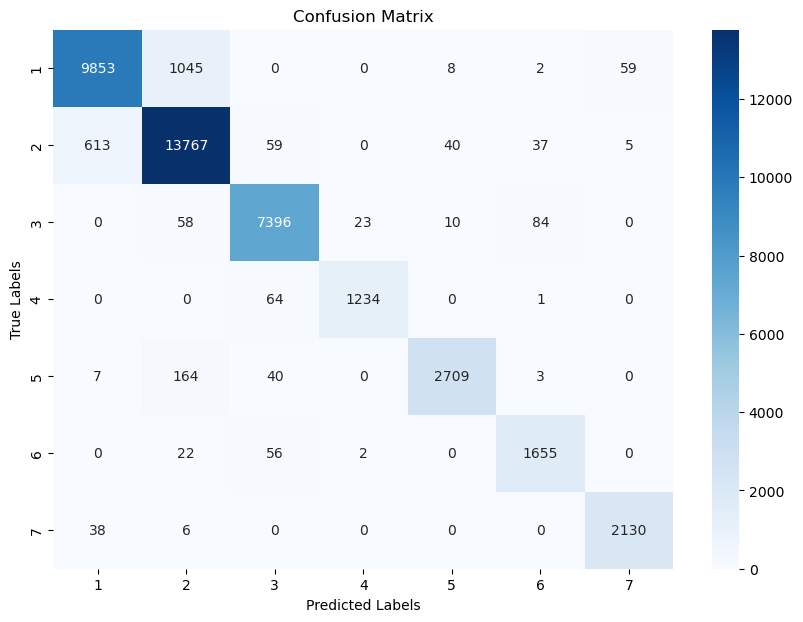

In [57]:
# Calculer la matrice de confusion
cm = confusion_matrix(y_valid_aug, y_pred)

# Afficher la matrice de confusion avec seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=range(1, 8), yticklabels=range(1, 8))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [58]:
# rf_pred_aug_4 = rf.predict(test)
# write_to_submission_file(rf_pred_aug_4, 
#                         'rf_pred_aug_4.csv')

In [59]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, f1_score, classification_report

# # Définition de la grille de paramètres
# param_grid = {
#     'n_estimators': [ 300, 400],
#     'criterion': ['gini', 'entropy'],
#     'max_features': ['sqrt', 'log2', None],
#     'bootstrap': [True, False]
# }

# # Initialisation du modèle
# rf = RandomForestClassifier(oob_score=False, n_jobs=-1, random_state=42)

# # Configuration du GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=1)

# # Exécution du GridSearchCV
# grid_search.fit(X_train_aug, y_train_aug)

# # Extraction du meilleur modèle
# best_rf = grid_search.best_estimator_

# # Prédiction et évaluation
# y_pred = best_rf.predict(X_valid_aug)
# accuracy = accuracy_score(y_valid_aug, y_pred)
# f1 = f1_score(y_valid_aug, y_pred, average="weighted")

# # Affichage des résultats
# model_name = type(best_rf).__name__
# print(f'{model_name} - Best Parameters: {grid_search.best_params_}')
# print(f'{model_name} - Accuracy: {accuracy:.2f}')
# print(f'{model_name} - f1_score: {f1:.2f}')
# print(classification_report(y_valid_aug, y_pred))


# XGBoost

In [60]:
sample_weight = compute_sample_weight(class_weight='balanced', y=y_train_aug)
xg = XGBClassifier(subsample = 1, n_estimators = 950, max_depth = 10, learning_rate = 0.3, colsample_bytree = 1.0,
                   eval_metric ='mlogloss', objective = 'multi:softmax',
                   num_class=7)

In [61]:
y_train_adjusted = y_train_aug - 1
y_valid_adjusted = y_valid_aug - 1
xg.fit(X_train_aug, y_train_adjusted, sample_weight=sample_weight)  
y_pred = xg.predict(X_valid_aug)  
accuracy = accuracy_score(y_valid_adjusted, y_pred) 
f1 = f1_score(y_valid_adjusted, y_pred , average="weighted") 
model_name = type(xg).__name__  
print(f'{model_name} - Accuracy: {accuracy:.2f}')
print(f'{model_name} - f1_score: {f1:.2f}')


XGBClassifier - Accuracy: 0.94
XGBClassifier - f1_score: 0.94


In [62]:
print(classification_report(y_valid_adjusted , y_pred ))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     10967
           1       0.93      0.94      0.93     14521
           2       0.98      0.97      0.98      7571
           3       0.99      0.99      0.99      1299
           4       0.97      0.95      0.96      2923
           5       0.89      0.97      0.93      1735
           6       0.96      0.98      0.97      2174

    accuracy                           0.94     41190
   macro avg       0.95      0.96      0.95     41190
weighted avg       0.94      0.94      0.94     41190



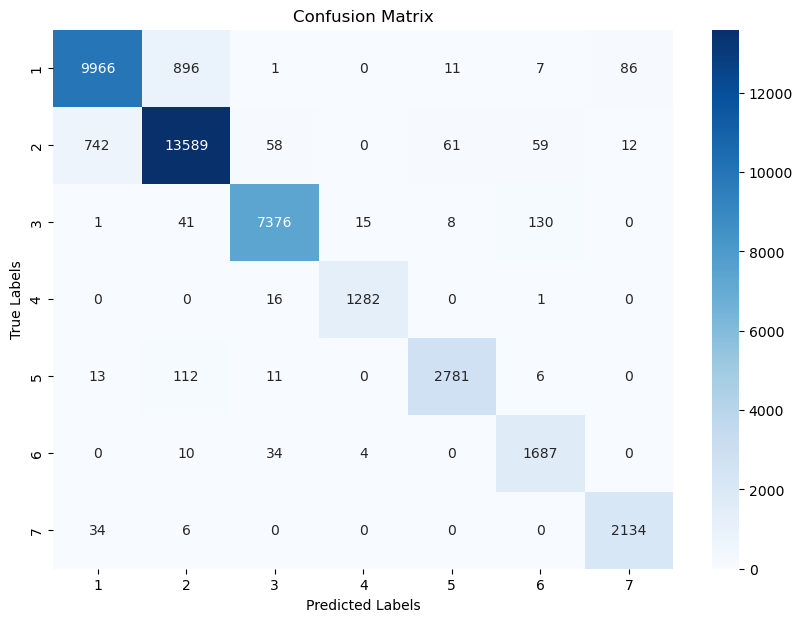

In [63]:
cm = confusion_matrix(y_valid_adjusted, y_pred)

# Afficher la matrice de confusion avec seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=range(1, 8), yticklabels=range(1, 8))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [64]:
# # Prédire les classes pour le jeu de données test
# xg_pred_aug = xg.predict(test)

# # Décaler les classes prédictes de 0-6 vers 1-7
# xg_pred_aug_adjusted = xg_pred_aug + 1

# # Écrire le fichier de soumission avec les classes ajustées
# write_to_submission_file(xg_pred_aug_adjusted, 'xg_pred_aug_7.csv')


In [65]:
# from sklearn.model_selection import RandomizedSearchCV
# from xgboost import XGBClassifier

# # Define parameter grid
# param_dist = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0]
# }

# # Create the model and RandomizedSearchCV
# xgb = XGBClassifier()
# random_search = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=10, cv=3, scoring='f1_weighted')
# random_search.fit(X_train_scaled, y_train_adjusted)

# # Best model
# best_xgb = random_search.best_estimator_

# # Predictions with the best model
# y_pred = best_xgb.predict(X_valid_scaled)
# accuracy = accuracy_score(y_valid, y_pred + 1)
# f1 = f1_score(y_valid, y_pred + 1, average="weighted")

# print(f'Best XGBClassifier - Accuracy: {accuracy:.2f}')
# print(f'Best XGBClassifier - F1 Score: {f1:.2f}')

# Print the best parameters from the search
# print(f"Best hyperparameters: {random_search.best_params_}")


## LightGBM

In [73]:
# Calcul des poids d'échantillon pour gérer le déséquilibre des classes

# Créer le modèle LightGBM
lgbm = lgb.LGBMClassifier(
    objective='multiclass',  # Classification multi-classes
    num_class=7,  # Nombre de classes (1-7)
    boosting_type='gbdt',  # Gradient Boosting Decision Tree
    metric='multi_logloss',  # Utilisation de la log-vraisemblance multi-classes
    class_weight='balanced',  # Pour gérer le déséquilibre des classes
    n_estimators=1000,  # Nombre d'arbres
    learning_rate=0.1,  # Taux d'apprentissage
    max_depth=-1,  # Pas de limite de profondeur des arbres
    subsample=0.8,  # Fraction des échantillons utilisés pour chaque arbre
    colsample_bytree=0.8,  # Fraction des caractéristiques utilisées pour chaque arbre
    random_state=42
)

In [76]:
# Entraînement du modèle
lgbm.fit(X_train_aug, y_train_aug)
# Prédiction sur les données de validation
y_pred = lgbm.predict(X_valid_aug)

# Évaluer la performance
accuracy = accuracy_score(y_valid_aug, y_pred) 
f1 = f1_score(y_valid_aug, y_pred , average="weighted") 
model_name = type(lgbm).__name__  
print(f'{model_name} - Accuracy: {accuracy:.2f}')
print(f'{model_name} - f1_score: {f1:.2f}')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2852
[LightGBM] [Info] Number of data points in the train set: 96107, number of used features: 13
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

In [77]:
# Rapport de classification
print(classification_report(y_valid_aug, y_pred))


              precision    recall  f1-score   support

           1       0.91      0.90      0.90     10967
           2       0.92      0.92      0.92     14521
           3       0.99      0.97      0.98      7571
           4       0.99      0.99      0.99      1299
           5       0.98      0.95      0.96      2923
           6       0.89      0.98      0.93      1735
           7       0.96      0.98      0.97      2174

    accuracy                           0.94     41190
   macro avg       0.95      0.96      0.95     41190
weighted avg       0.94      0.94      0.94     41190



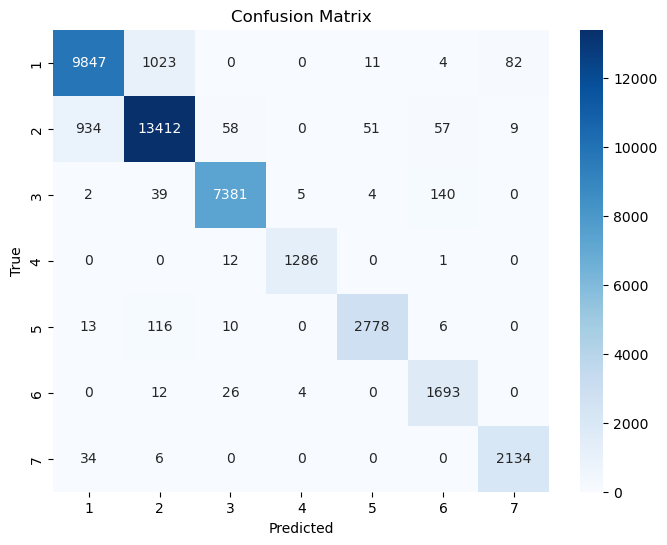

In [78]:
# Affichage des résultats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Matrice de confusion
cm = confusion_matrix(y_valid_aug, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 8), yticklabels=range(1, 8))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [79]:
# # Prédire les classes pour le jeu de données test
# lgbm_pred_aug = lgbm.predict(test)

# # Écrire le fichier de soumission avec les classes ajustées
# write_to_submission_file(lgbm_pred_aug, 'lgbm_pred_aug_2.csv')